# Zusammenfassung
Dieses Notebook analysiert die Ähnlichkeit von Wahlprogrammen politischer Parteien zu den Europawahlen 2019 basierend auf tf-idf. Dazu werden mehrere Schritte durchgeführt:<br><br>
**Data Preprocessing**<br>
Die Programme werden eingelesen und der Text weiterverarbeitet. Dabei findet eine Kleinschreibung, die Entfernung von Stoppwörtern und Sonderzeichen und die Tokenisierung statt.
<br><br>
**CountVectorizer**<br>
Um die Dokumente zu untersuchen wird im ersten Schritte eine deskriptive Analyse anhand der Wordhäufigkeiten durchgeführt.
<br><br>
**TF-IDF**<br>
Mithilfe von tf-idf werden die Wortvorkommen in den Dokumenten gewichtet und in vektorisierter Form bereitsgestellt.
<br><br>
**Cosine Similarity**<br>
Die Cosine Similarity ist eine Kennzahl um die Ähnlichkeit von Vektoren darzustellen. Dabei werden bei der Cosine Similarity die Winkel zwischen den Vektoren berechnet.


# Import Modules

In [243]:
from os import listdir #gets filenames from Folder
import PyPDF2 #imports pdf

import pandas as pd #stores data as dataframe
import numpy as np # mathematical calculation, underlying pandas

import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Out-of-the box viz, building on plt
sns.set_style("darkgrid") #Set default seaborn style

#NLTK
from nltk.stem.snowball import GermanStemmer #German Stemmer
stem=GermanStemmer() # Initialistes stemmer
from nltk.tokenize import word_tokenize #Tokenizes Text
from nltk.corpus import stopwords #importing stopwords without meaning like "und", "wenn" ...

import re #Regular Expressions, for replacing patterns 

# Import Files
The analysis includes elections programs from ten german political parties. They were downloaded from the respective websites and are stored as *.pdf.

## Fetch File Names

In [244]:
# Enter your folder here
folder= "2019"
files = listdir(folder)

In [245]:
files

['afd.pdf',
 'cdu.pdf',
 'familie.pdf',
 'fdp.pdf',
 'grüne.pdf',
 'linke.pdf',
 'mensch_umwelt.pdf',
 'npd.pdf',
 'oedp.pdf',
 'spd.pdf']

## Create Dictionary
The programs are loaded and saved as a strings. These strings later get

In [246]:
programms = {}

In [247]:
for each in files:
    docs=""
    with open(folder+"/"+each, mode='rb') as f:
        reader = PyPDF2.PdfFileReader(f)
        for page in reader.pages:
            text=page.extractText()
            docs= docs+ " | " +text
        print(each + "- done!")
    programms[folder + each] = docs

afd.pdf- done!
cdu.pdf- done!
familie.pdf- done!
fdp.pdf- done!
grüne.pdf- done!
linke.pdf- done!
mensch_umwelt.pdf- done!
npd.pdf- done!
oedp.pdf- done!
spd.pdf- done!


# Data Preprocessing

In [248]:
#Lowercase, Remove Numbers and Tokenize
for each in programms:
    programms[each] = programms[each].lower()
    programms[each] = re.sub('\d', '', programms[each])
    programms[each] = re.sub('_|-|ˆ|ˇ', '', programms[each])
    programms[each] = word_tokenize(programms[each])

In [249]:
for each in programms:
    #Build Word List
    punctuations = ['(','.','!',')',';',':','[',']',',','|','_','-','ˆ']

    #We initialize the stopwords variable which is a list of words like #"The", "I", "and", etc. that don't hold much value as keywords
    stop_words = stopwords.words('german')

    #We create a list comprehension which only returns a list of words #that are NOT IN stop_words and NOT IN punctuations.
    programms[each] = [word for word in programms[each] if not word in stop_words and not word in punctuations]
    
    #Stem Words
    programms[each] = [stem.stem(word) for word in programms[each]]

In [250]:
#List of strings
lis = []

for doc in programms:
    lis.append(str(programms[doc]))
    
#corpus = list(lis.values()) # Get your list of lists of strings
#corpus = sum(lis, []) # Good trick for flattening 2D lists to 1D

In [251]:
full = ""

for doc in programms:
    full = full + str(programms[doc])
    
full = [full]

# Count Vectorizer

In [252]:
from sklearn.feature_extraction.text import CountVectorizer

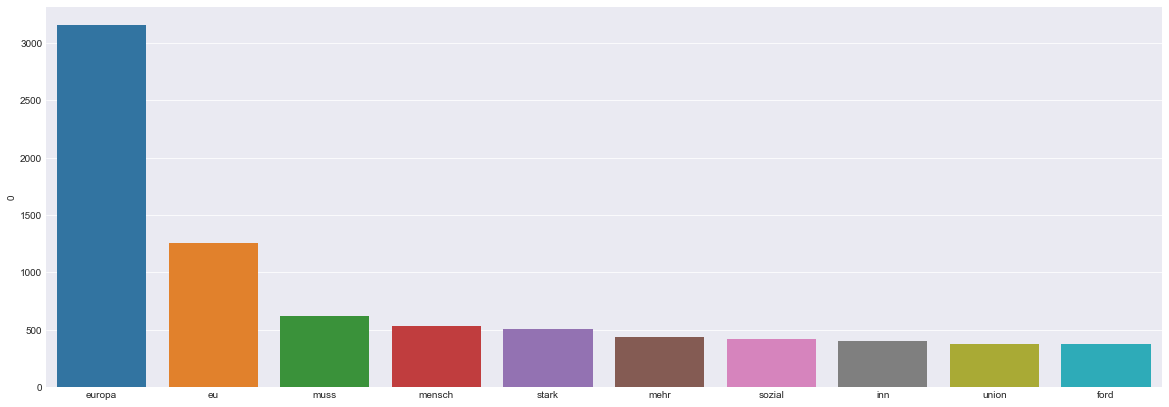

In [253]:
count = CountVectorizer()
X = count.fit_transform(full)
total_counts = pd.DataFrame(data=X.T.todense(),index=count.get_feature_names()).sort_values(by=0, ascending=False)
words = total_counts.head(10)
plt.figure(figsize=(20,7))
sns.barplot(x=words.index.values, y=words[0])

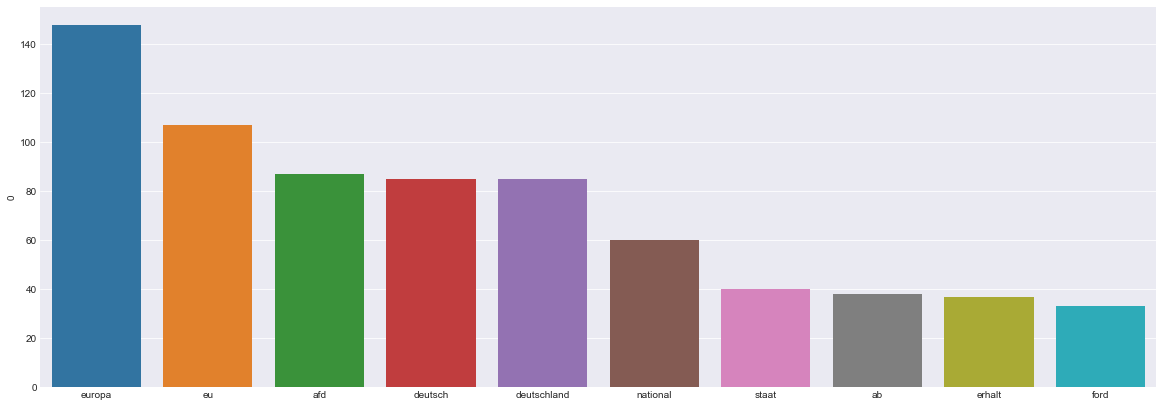

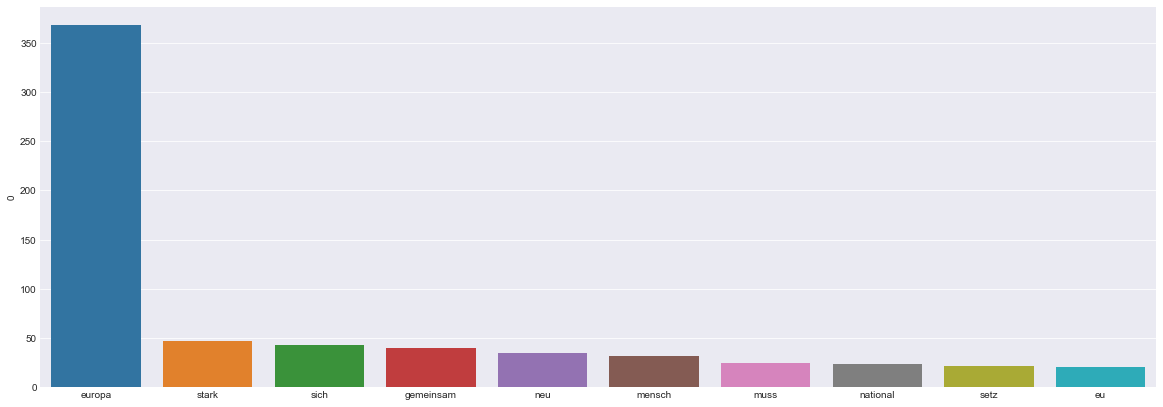

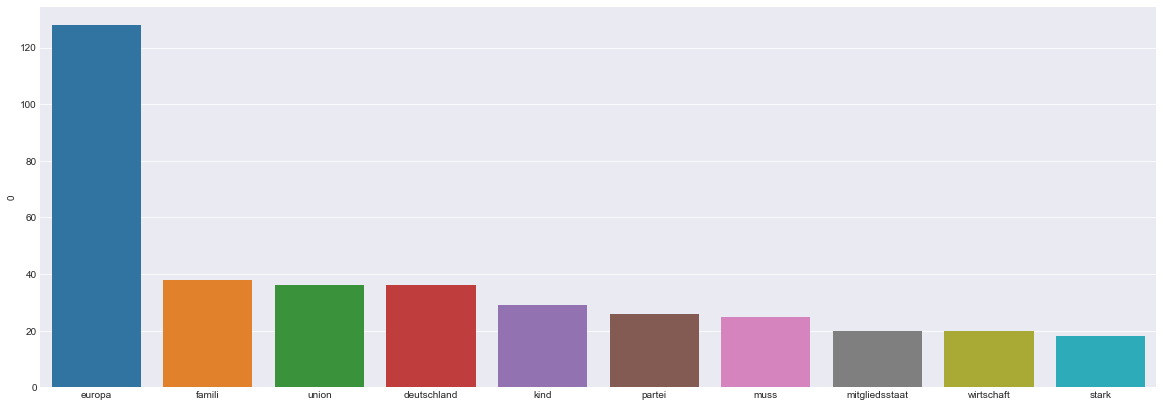

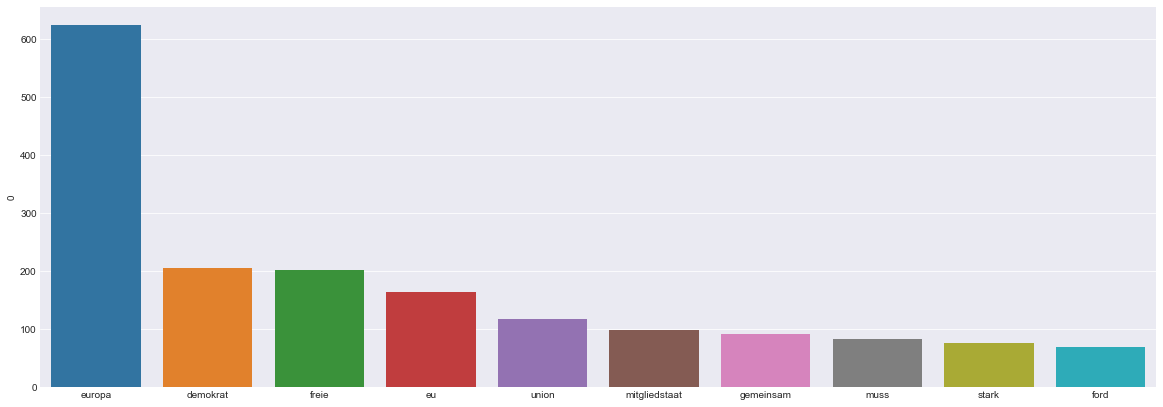

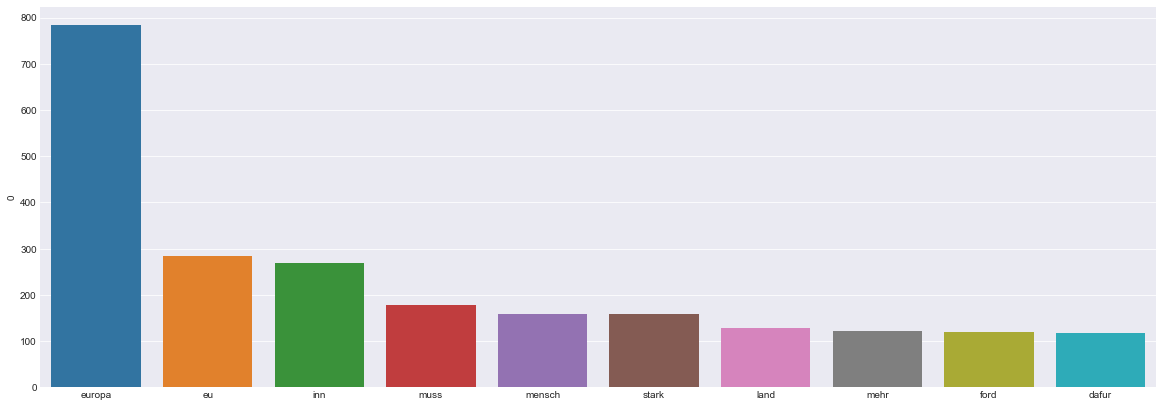

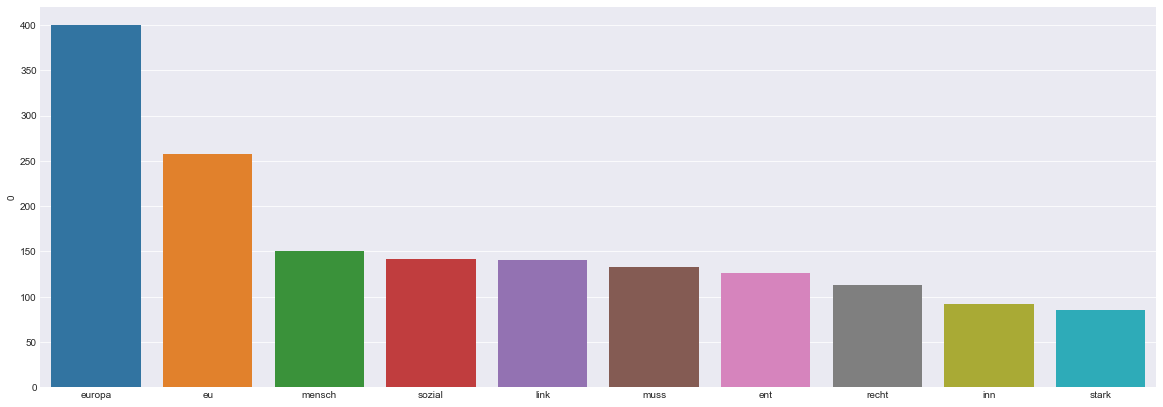

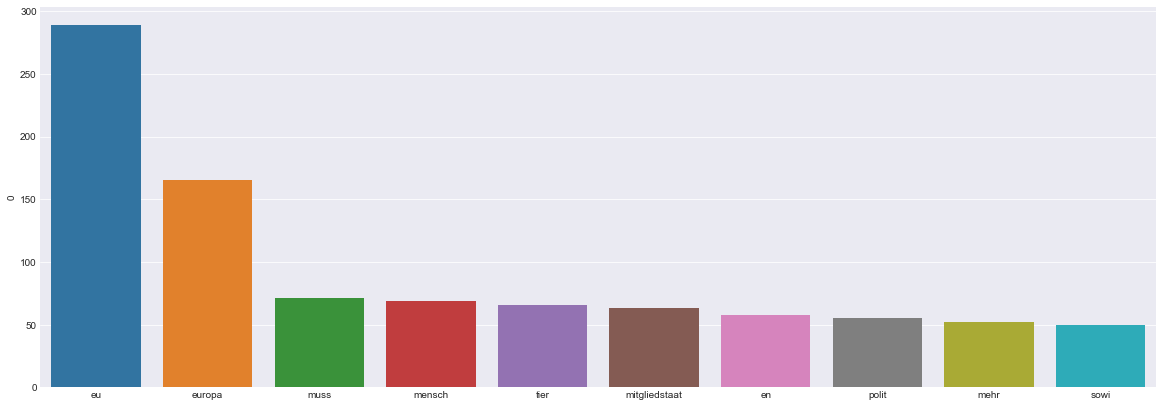

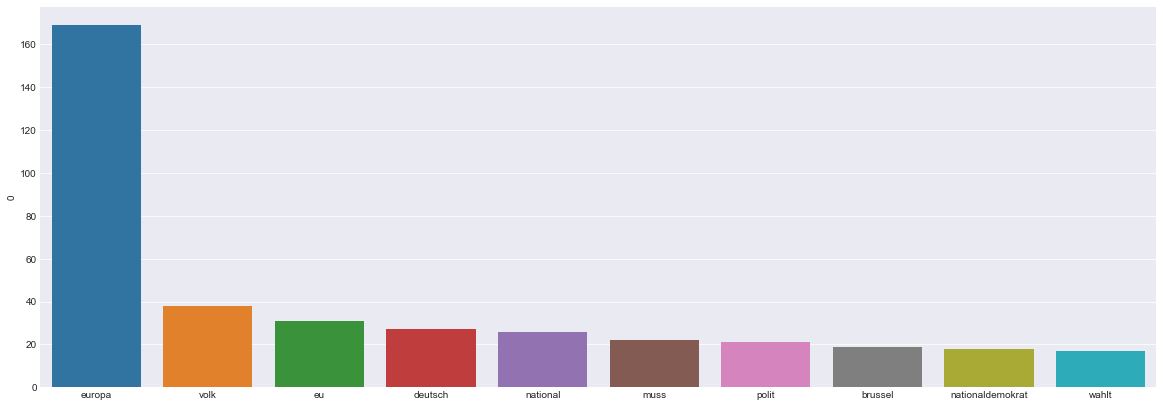

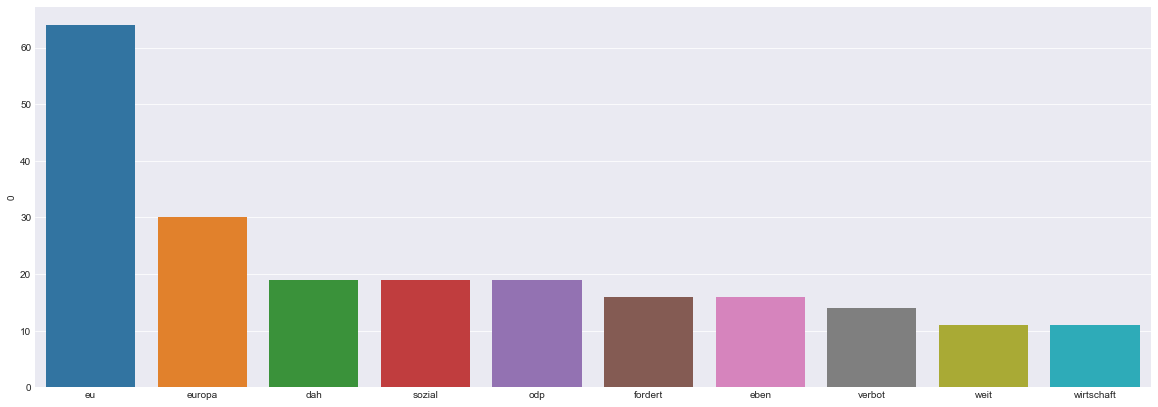

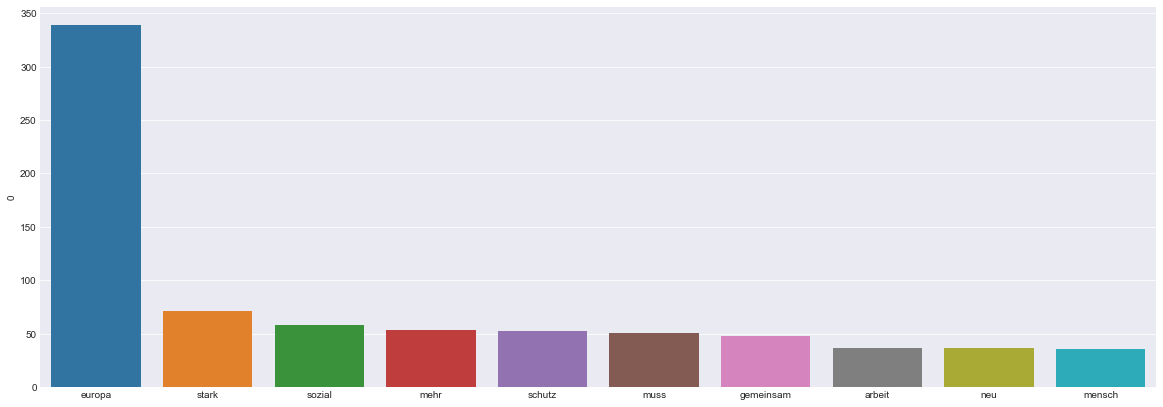

In [254]:
for each in lis:
    each = [each]
    count = CountVectorizer()
    X = count.fit_transform(each)
    words = pd.DataFrame(data=X.T.todense(),index=count.get_feature_names()).sort_values(by=0, ascending=False).head(10)
    plt.figure(figsize=(20,7))
    sns.barplot(x=words.index.values, y=words[0])

# TF-IDF

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [256]:
tfidf = TfidfVectorizer(lowercase=False)
res=tfidf.fit_transform(lis)

In [257]:
feature_names = tfidf.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=res[4]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
europa,0.613605
eu,0.221493
inn,0.209753
muss,0.139313
mensch,0.124443
stark,0.123660
land,0.100180
mehr,0.094702
ford,0.093919
dafur,0.092354


## Häufigste Worte und TF-IDF per Partei

In [258]:
df=pd.DataFrame(data=res.T.toarray(), index=tfidf.get_feature_names())

In [275]:
df=pd.merge(df,total_counts, left_index=True, right_index=True)

In [283]:
df_head=df.sort_values("0_y", ascending=False).head(20).drop(columns=["0_y","summe"])

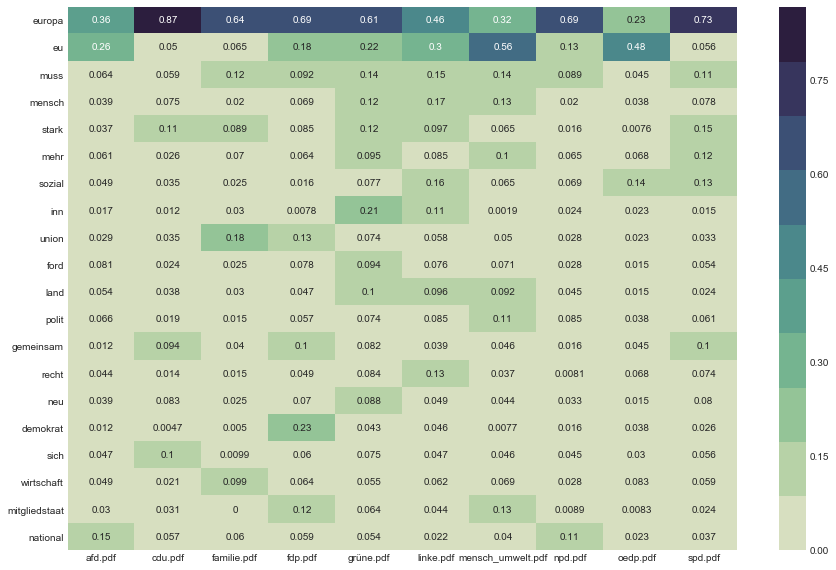

In [284]:
plt.figure(figsize=(15,10))
g=sns.heatmap(df_head, annot=True, cmap=sns.cubehelix_palette(10, start=.5, rot=-.75))
g=g.set(xticklabels=files)

# Cosine Similarity

In [197]:
from sklearn.metrics.pairwise import cosine_similarity

In [198]:
length=len(files)

In [199]:
matrix = np.empty([length,length])

In [200]:
for col in range(length):
    for row in range(length): 
        cosine_similarities = cosine_similarity(res[col], res[row]).flatten()
        matrix[col][row]=cosine_similarities

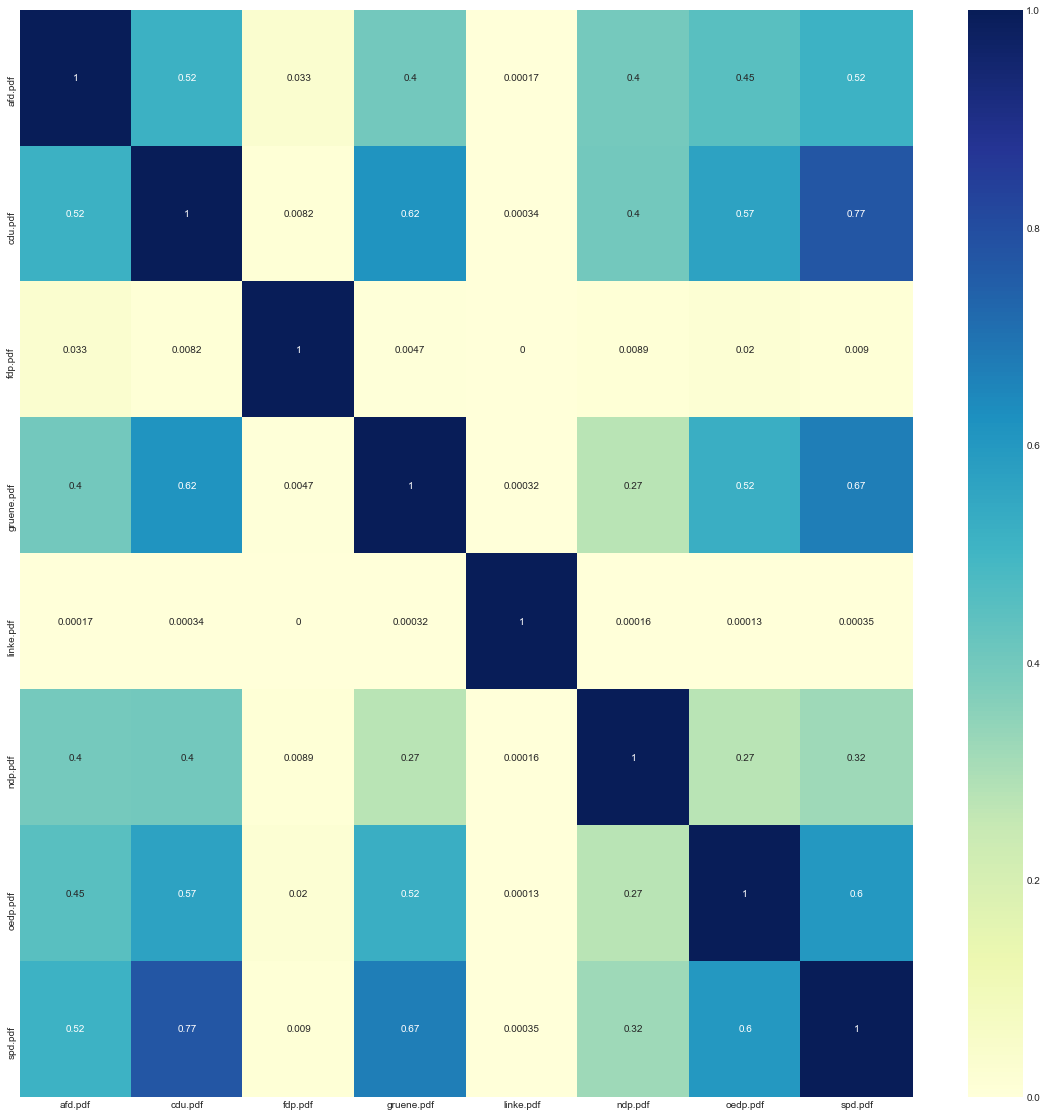

In [201]:
plt.figure(figsize=(20,20))
g=sns.heatmap(matrix, cmap="YlGnBu", annot=True)
g=g.set(xticklabels=files, yticklabels=files)

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit(res)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
lines_for_predicting=["europa"]
a=kmeans.predict(tfidf.transform(lines_for_predicting))

In [27]:
pd.DataFrame(index=files, data=kmeans.labels_).sort_values(by=0)

,0
familie.pdf,0
grüne.pdf,1
linke.pdf,1
cdu.pdf,2
fdp.pdf,2
npd.pdf,2
spd.pdf,2
oedp.pdf,3
afd.pdf,4
mensch_umwelt.pdf,5


## Search for Terms

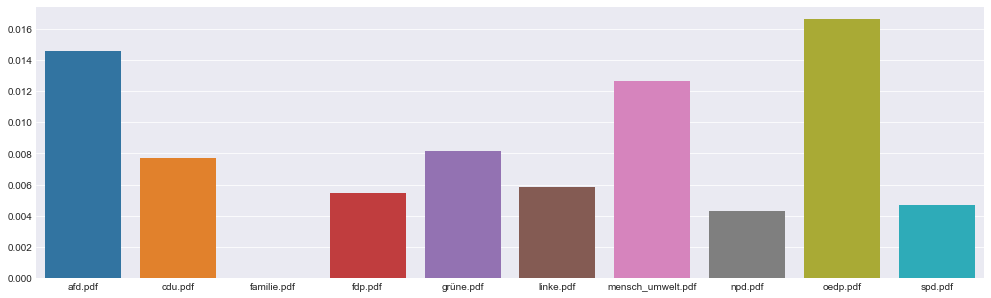

In [29]:
search_term = "asyl"
search_term = stem.stem(search_term.lower())
search_term = word_tokenize(search_term)
#search_term = [search_term]

query = tfidf.transform(search_term)

y= []

for row in range(length): 
    y.append(cosine_similarity(query, res[row]).flatten()[0])
    
plt.figure(figsize=(17,5))
sns.barplot(x=files, y=y)

In [469]:
search_term

['fluchtlinge', 'klauen', 'unserer', 'frau']